In [1]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

## 1. Data

In [2]:
# Create data using linear regression y= mx+c
weight = 0.5
bias = 0.2

#Create range values
start = 0
end = 1
step = 0.02

#Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias


In [3]:
#split the data
train_split = int(0.8* len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]


In [4]:
#plot prediction function
def plot_predictions(train_data= X_train,
                     train_labels = y_train,
                     test_data= X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = "b", s=4, label = "Training data")
    plt.scatter(test_data, test_labels, c = "g", s=4, label = "Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
        
    plt.legend(prop={"size": 14})


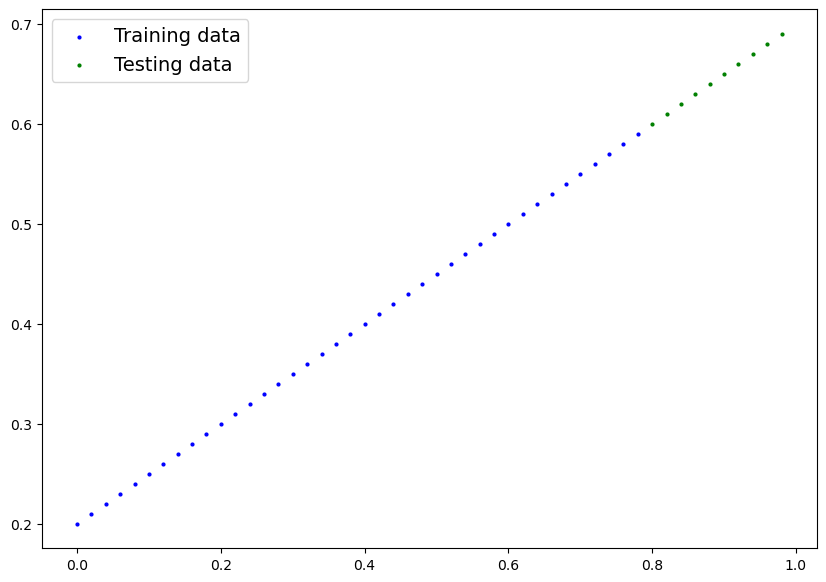

In [5]:
plot_predictions(X_train , y_train, X_test, y_test)

## 2.Building pytorch linear model

In [6]:
#create linear model by subclassing nn.module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.linear() for creating model parameter
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
        
torch.manual_seed(37)
model_1 = LinearRegressionModelV2()
model_1 , model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.5823]])),
              ('linear_layer.bias', tensor([0.2837]))]))

## 3 Training 
* loss function
* optimizer
* training loop
* testing loop

In [7]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_1.parameters(), lr = 0.1)


In [8]:
torch.manual_seed(37)

epochs = 200

for epoch in range(epochs):
    model_1.train()
    #Forward propagation
    y_pred = model_1(X_train)
    # loss calculate
    loss = loss_fn(y_pred, y_train)
    # optimizer zero grad
    optimizer.zero_grad()
    # back propagtation
    loss.backward()    
    # optimizer step
    optimizer.step()
    
    ###Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    



Epoch: 0 | Loss: 0.11581681668758392 | Test loss: 0.022237813100218773
Epoch: 10 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 20 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 30 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 40 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 50 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 60 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 70 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 80 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 90 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 100 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 110 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 120 | Loss: 0.012934151105582714 | Test loss: 0.13245677947998047
Epoch: 130 | Loss: 0.012934151105582714 | Test loss: 0.1324567

In [9]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5214]])),
             ('linear_layer.bias', tensor([0.1787]))])

### 4. Making eval predictions

In [10]:
model_1.eval()

with torch.inference_mode():
    y_pred = model_1(X_test)
y_pred

tensor([[0.5958],
        [0.6063],
        [0.6167],
        [0.6271],
        [0.6375],
        [0.6480],
        [0.6584],
        [0.6688],
        [0.6792],
        [0.6897]])

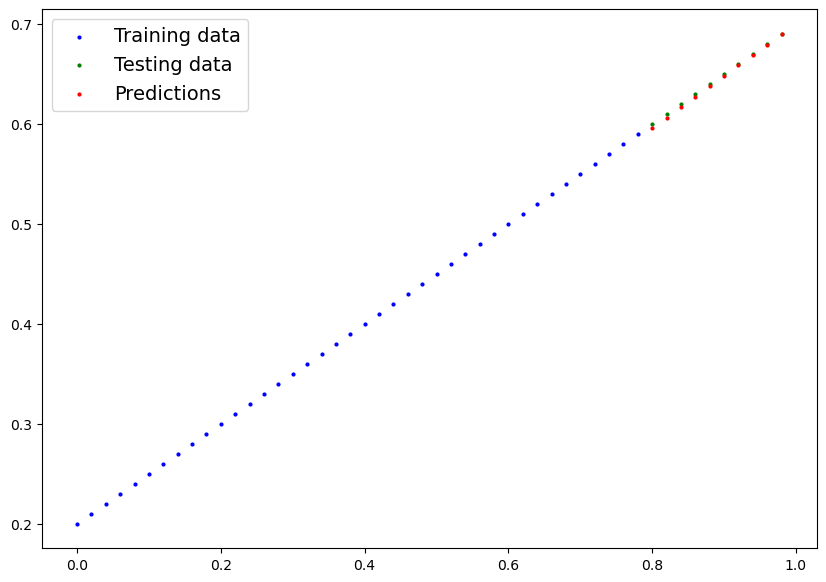

In [11]:
plot_predictions(predictions=y_pred)

### 5. Saving & loading model

In [12]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2 Create model save path
Model_name = "number1_model.pt"
Model_save_path = MODEL_PATH / Model_name

#3 Save the model state dict
print(f"saving model to: {Model_save_path}")
torch.save(obj=model_1.state_dict(), f=Model_save_path)


saving model to: models\number1_model.pt


In [13]:
#load a Pytorch
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(Model_save_path))
loaded_model_1.to("cpu")


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [14]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5214]])),
             ('linear_layer.bias', tensor([0.1787]))])

In [15]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_pred == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])